In [156]:
import pandas as panda
import datetime as dt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [157]:
df = panda.read_csv('NAS.csv')

# Dropping NaN entries 
df.dropna(inplace = True)

#Convert from Date column string to float
df['Date'] = panda.to_datetime(df['Date'])
df['Date'] = df['Date'].map(dt.datetime.toordinal)
df.head()



df_date_close = df.drop(["Open","High","Low", "Adj Close", "Volume"], axis="columns")


In [158]:
# split the data into train and test set
train, test = train_test_split(df_date_close, test_size=0.2, random_state=42, shuffle=True)

In [159]:
train_date = train.drop("Close", axis = "columns")
test_date = test.drop("Close", axis = "columns")

In [160]:
train_close = train.drop("Date", axis = "columns")
test_close = test.drop("Date", axis = "columns")

In [161]:
train_date.head()

,Date
468,732223
1704,734009
2722,735487
3318,736353
3194,736178


In [162]:
reg_obj_train = linear_model.LinearRegression()
reg_obj_train.fit(train_date,train_close)

LinearRegression()

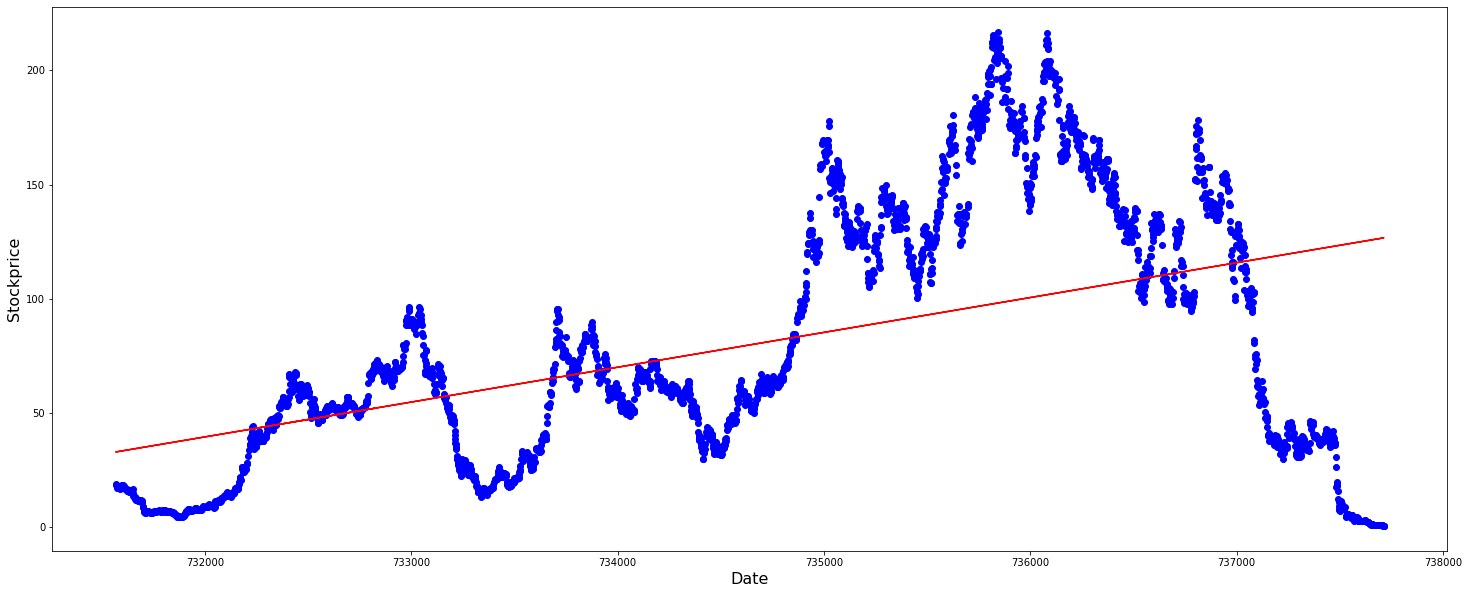

In [200]:
#%matplotlib inline
plt.figure(figsize=(25,10))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(train_date,train_close,color='blue')
plt.plot(train_date,reg_obj_train.predict(train[['Date']]),color='red')

In [185]:
reg_obj_test = linear_model.LinearRegression()
reg_obj_test.fit(test_date,test_close)
prediction = reg_obj_test.predict(test_date)

In [165]:
print('Coefficients: \n', regObj.coef_)

Coefficients: 
 [[0.01524447]]


In [166]:
print('Mean squared error: %.2f'
      % mean_squared_error(test_close, prediction))

Mean squared error: 2198.67


In [167]:
print('Coefficient of determination: %.2f'
      % r2_score(test_close, prediction))

Coefficient of determination: 0.27


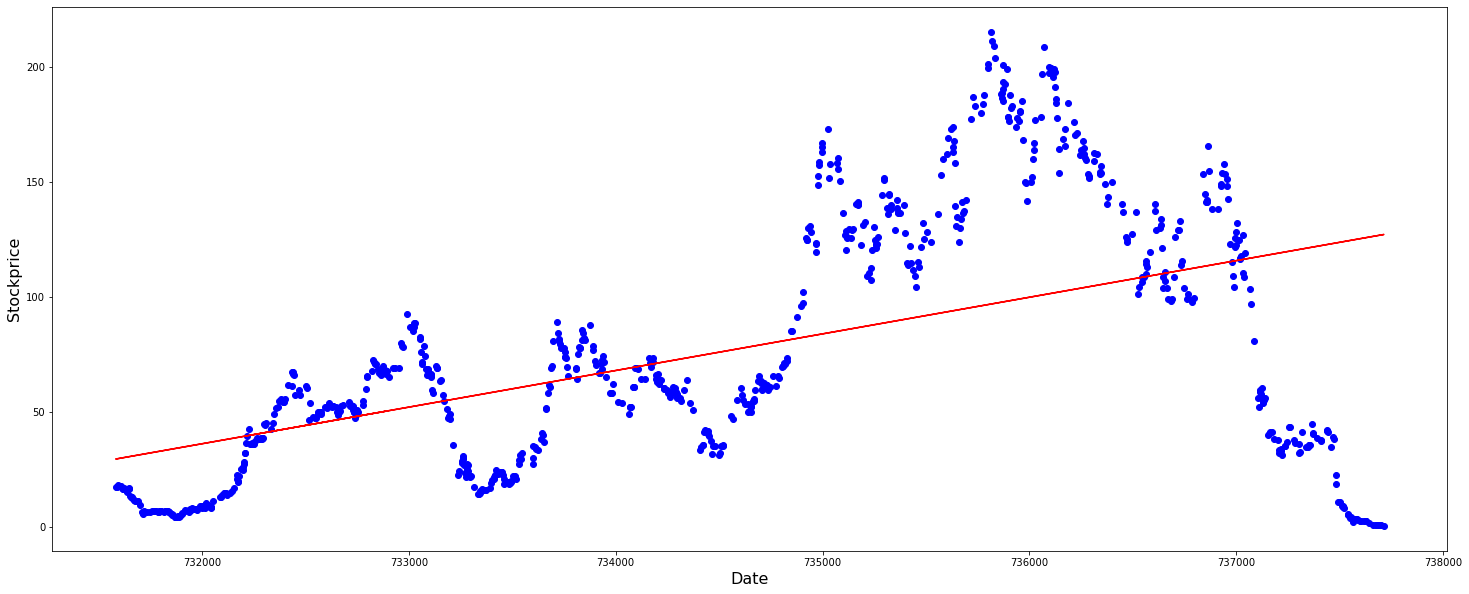

In [180]:
#%matplotlib inline
plt.figure(figsize=(25,10))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Stockprice',fontsize=16)
#Visual Represention of linear equation with Linear Regression
plt.scatter(test_date,test_close,color='blue')
plt.plot(test_date, prediction,color='red')

In [169]:
len(test_close)

844

In [170]:
len(train)

3374

In [195]:
reg_obj_train.predict([[734000]])

array([[70.12120785]])

In [201]:
datetime.fromordinal(73400)

NameError: name 'datetime' is not defined